In [35]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

In [30]:
# Import data
dataset = pd.read_csv('insurance.csv')
# Show last 5 lines
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [31]:
# Separate training data and target data
X = dataset.drop('expenses', axis=1)
y = dataset['expenses']

In [32]:
# Change categorical columns to numerical
X['sex'] = np.where(X['sex']=='male', 0,1)
X['smoker'] = np.where(X['smoker']=='no', 0,1)

In [33]:
# Convert region column into indicator variables
X = X.join(pd.get_dummies(X['region'], prefix='region'))
X = X.drop('region', axis=1)

In [60]:
# Separate values into the train and test datasets
train_dataset, test_dataset, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
# Initialize parametrs for grid search
parameters = {
    "n_estimators": [420, 440, 480, 500], 
    "learning_rate": [0.01, 0.05], 
    "max_depth": [2, 4, 6], 
    "subsample": [0.3, 0.5]
}
# Initialize grid search and the model
grid = GridSearchCV(XGBRegressor(objective='reg:squarederror'), parameters)
# Fit the model
grid.fit(train_dataset, train_labels)
# Print best paremetrs
print(grid.best_params_)

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500, 'subsample': 0.5}


In [63]:
# Initialize and fit final model
xgb_model = XGBRegressor(objective='reg:squarederror', n_jobs=8, learning_rate=0.01, max_depth=4, n_estimators=300,
subsample=0.3, early_stopping_rounds=5).fit(train_dataset, train_labels, eval_set=[(test_dataset, test_labels)], verbose=False)

In [64]:
# Get MAE value
mean_absolute_error(test_labels, xgb_model.predict(test_dataset))

2203.9123041044777

Testing set Mean Abs Error: 2203.91 expenses
You passed the challenge. Great job!


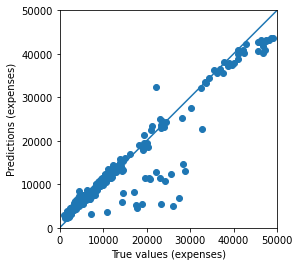

In [66]:
# Check if model is good enough to pass the test
mae = mean_absolute_error(test_labels, xgb_model.predict(test_dataset))

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = xgb_model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)